In [19]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import tensorflow as tf

sys.path.append(os.path.abspath(".."))

### Loading the Dataset

In [20]:
df = pd.read_csv("../datasets/perceptron_toydata-truncated.txt", sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [21]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

print("Train set:", X_train.shape, y_train.shape)

Train set: (20, 2) (20,)


In [22]:
print("Training labels:")
counts = Counter(y_train)
for key, value in counts.items():
    print(f"{key}: {value}")

Training labels:
0: 10
1: 10


### Visualizing the Dataset

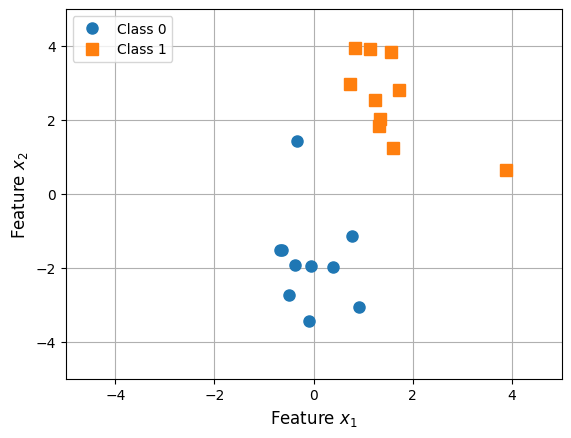

In [23]:
from modules.plotting_helper import plot_feature2d
plot_feature2d(X_train, y_train, markersize=8)

### Design the Model
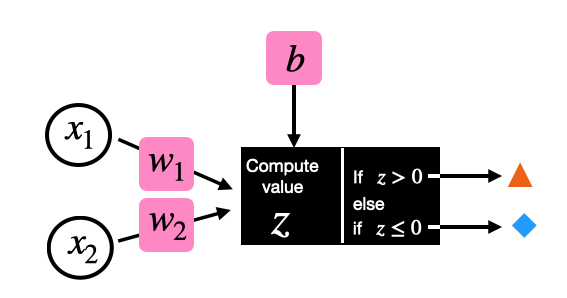

In [24]:
class Perceptron():
    def __init__(self, input_dim, lr=0.01):
        self.lr = lr
        self.input_dim = input_dim 
        self.weights = tf.Variable(tf.zeros(input_dim))
        self.bias = tf.Variable(0.)

    def activation(self, z):
        return tf.constant(float(z > 0))
    
    def forward(self, x):
        z = tf.tensordot(x, self.weights, axes=1) + self.bias
        return self.activation(z)
    
    def loss_fn(self, x, y):
        y_pred = self.forward(x)
        loss = y - y_pred
        return loss

### Train the Model

In [25]:
def train(model, X_train, y_train, num_epochs):
    history = []
    for i in range(num_epochs):
        epoch_loss = 0.0
        for x_train, y_true in zip(X_train, y_train):
            loss = model.loss_fn(x_train, y_true)
            model.bias.assign_add(model.lr * loss)
            model.weights.assign_add(model.lr * loss * x_train)
            epoch_loss += abs(loss)
        history.append(epoch_loss)
        print(f'Epoch: {i+1:03d}/{num_epochs:03d}'
              f' | Loss: {epoch_loss:.2f}')
    return history

  
X_train_tensor = tf.constant(X_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)

model = Perceptron(input_dim=2)
history = train(model, X_train_tensor, y_train_tensor, num_epochs=5)

Epoch: 001/005 | Loss: 1.00
Epoch: 002/005 | Loss: 3.00
Epoch: 003/005 | Loss: 1.00
Epoch: 004/005 | Loss: 0.00
Epoch: 005/005 | Loss: 0.00


In [26]:
bias = model.bias.numpy()
weights = model.weights.numpy()
print("Bias:", bias)
print("Weights:", weights)

Bias: -0.03
Weights: [0.0286 0.0198]


### Evaluate the model

In [27]:
def predict(model, X):
    return tf.stack([model.forward(x) for x in X])

def accuracy(y_true, y_pred):
    return tf.reduce_sum(tf.cast(tf.equal(y_pred, y_true), tf.float32)) / len(y_true)

In [28]:
predictions = predict(model, X_train_tensor)
y_preds = tf.cast(predictions >= 0.5, tf.float32)

acc = accuracy(y_train_tensor, y_preds)
print(f"Train Accuracy: {acc:.2f}")

Train Accuracy: 1.00


### Visualize the Results

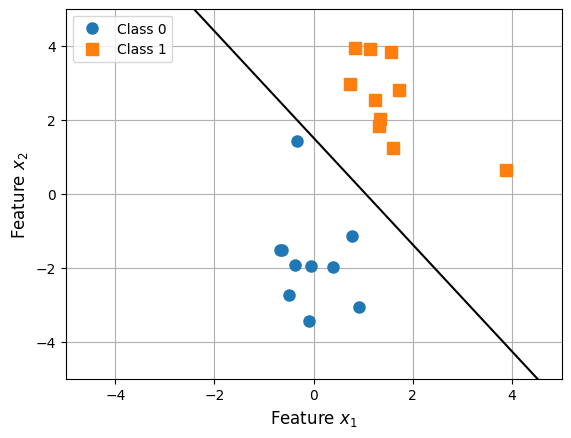

In [29]:
plot_feature2d(X_train, y_train, bias, weights, markersize=8)